

# Project: Investigate TMDb Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.

<a id='intro'></a>
## Research Questions
1-Which genres are most popular from year to year?<br>
2-Which year has the highest release of movies?<br>
3-Which movies are the most popular of all time?<br>
4-Which movie title had the highest budget?<br>
5-Does a bigger film production budget result in more popularity?


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 



<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head(10)

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   
5  281957  tt1663202    9.110700  135000000   532950503   
6   87101  tt1340138    8.654359  155000000   440603537   
7  286217  tt3659388    7.667400  108000000   595380321   
8  211672  tt2293640    7.404165   74000000  1156730962   
9  150540  tt2096673    6.326804  175000000   853708609   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   
5                  The Revenant   
6            Terminator Genisys   
7                   The Martian   
8                       Minions   
9                    Inside Out   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   
5  Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...   
6  Arnold Schwarzenegger|Jason Clarke|Emilia Clar...   
7  Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...   
8  Sandra Bullock|Jon Hamm|Michael Keaton|Allison...   
9  Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...   

                                            homepage  \
0                      http://www.jurassicworld.com/   
1                        http://www.madmaxmovie.com/   
2     http://www.thedivergentseries.movie/#insurgent   
3  http://www.starwars.com/films/star-wars-episod...   
4                           http://www.furious7.com/   
5       http://www.foxmovies.com/movies/the-revenant   
6                    http://www.terminatormovie.com/   
7        http://www.foxmovies.com/movies/the-martian   
8                       http://www.minionsmovie.com/   
9                http://movies.disney.com/inside-out   

                         director  \
0                 Colin Trevorrow   
1                   George Miller   
2                Robert Schwentke   
3                     J.J. Abrams   
4                       James Wan   
5  Alejandro GonzÃ¡lez IÃ±Ã¡rritu   
6                     Alan Taylor   
7                    Ridley Scott   
8        Kyle Balda|Pierre Coffin   
9                     Pete Docter   

                                           tagline  ...  \
0                                The park is open.  ...   
1                               What a Lovely Day.  ...   
2                       One Choice Can Destroy You  ...   
3                    Every generation has a story.  ...   
4                              Vengeance Hits Home  ...   
5  (n. One who has returned, as if from the dead.)  ...   
6                                 Reset the future  ...   
7                                   Bring Him Home  ...   
8     Before Gru, they had a history of bad bosses  ...   
9         Meet the little voices inside your head.  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   
5  In the 1820s, a frontiersman, Hugh Glass, sets...     156   
6  The year is 2029. John Connor, leader of the r...     125   
7  During a manned mission to Mars, Astronaut Mar...     141   
8  Minions Stuart, Kevin and Bob are recruited by...      91   
9  Growing up can be a bumpy road, and 

In [4]:
df.shape

(10866, 21)

In [5]:
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

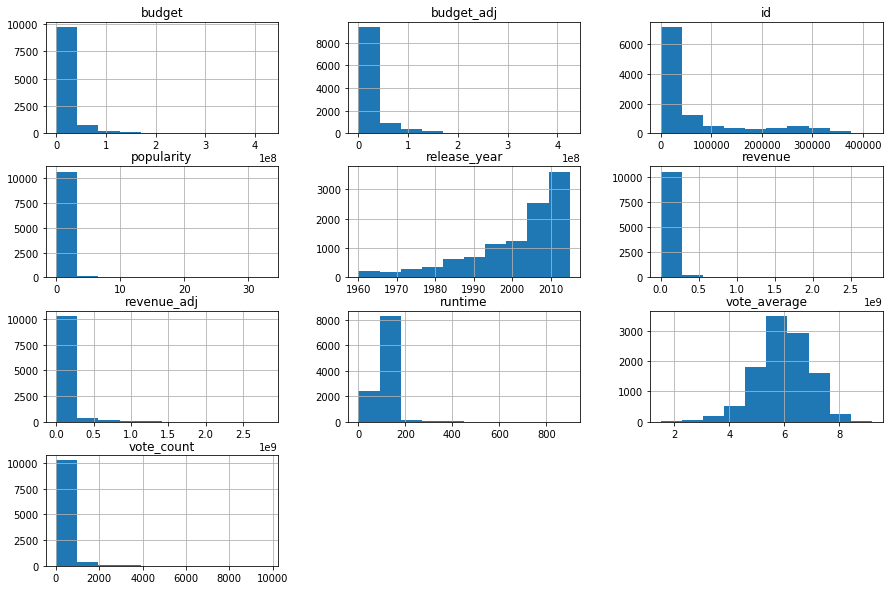

In [7]:
# hist of the date before cleaning
df.hist(figsize=(15,10));


<a id='eda'></a>
##  Data Cleaning

> **Tip**: Cleaning the data by drop the duplicated rows and drop the nan value if it needs 

In [8]:
df.duplicated().sum()

1

In [9]:
#drop duplicates
df.drop_duplicates(inplace =True);

In [10]:
#be sure duplicated removed
df.duplicated().sum()

0

In [11]:
df.shape

(10865, 21)

In [13]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [14]:
df[df.cast.isnull()]

id    imdb_id  popularity  budget  revenue  \
371    345637  tt4661600    0.422901       0        0   
441    355020  tt4908644    0.220751       0        0   
465    321109  tt4393514    0.201696       0        0   
536    333350  tt3762974    0.122543       0        0   
538    224972  tt3983674    0.114264       0        0   
...       ...        ...         ...     ...      ...   
9677    13926  tt0093832    0.253376       0        0   
9755    48714  tt0061402    0.046272       0        0   
10434   48784  tt0060984    0.146906     200        0   
10550   13925  tt0091455    0.306425       0        0   
10754    3171  tt0064064    0.002757       0        0   

                                    original_title cast  \
371                            Sanjay's Super Team  NaN   
441    Winter on Fire: Ukraine's Fight for Freedom  NaN   
465                                    Bitter Lake  NaN   
536                                 A Faster Horse  NaN   
538                           The Mask You Live In  NaN   
...                                            ...  ...   
9677                                   Red's Dream  NaN   
9755                                 The Big Shave  NaN   
10434                         Six Men Getting Sick  NaN   
10550                                     Luxo Jr.  NaN   
10754                         Bambi Meets Godzilla  NaN   

                                                homepage  \
371                                                  NaN   
441                http://www.netflix.com/title/80031666   
465                                                  NaN   
536                                                  NaN   
538                          http://themaskyoulivein.org   
...                                                  ...   
9677                                                 NaN   
9755                                                 NaN   
10434                                                NaN   
10550  http://www.pixar.com/short_films/Theatrical-Sh...   
10754                                                NaN   

                     director  \
371              Sanjay Patel   
441         Evgeny Afineevsky   
465               Adam Curtis   
536                David Gelb   
538    Jennifer Siebel Newsom   
...                       ...   
9677            John Lasseter   
9755          Martin Scorsese   
10434             David Lynch   
10550           John Lasseter   
10754            Marv Newland   

                                                 tagline  ...  \
371                                                  NaN  ...   
441                    The Next Generation Of Revolution  ...   
465                                                  NaN  ...   
536                                                  NaN  ...   
538    Is american masculinity harming our boys, men ...  ...   
...                                                  ...  ...   
9677                                                 NaN  ...   
9755                                                 NaN  ...   
10434                                                NaN  ...   
10550                                                NaN  ...   
10754                                                NaN  ...   

                                                overview runtime  \
371    Sanjay's Super Team follows the daydream of a ...       7   
441    A documentary on the unrest in Ukraine during ...      98   
465    An experimental documentary that explores Saud...     135   
536    David Gelb (Jiro Dreams of Sushi) tackles anot...      90   
538    Compared to girls, research shows that boys in...      88   
...                                                  ...     ...   
9677   Life as the sole sale item in the clearance co...       4   
9755   This short film is a metaphor for the Vietnam ...       6   
10434  Lynch's first film project consists of a loop ...       4   
10550  A baby lamp finds a ball to pla

In [17]:
df['tagline'].value_counts()

Based on a true story.                                                                                                         5
Be careful what you wish for.                                                                                                  3
Two Films. One Love.                                                                                                           3
Some things are better left buried.                                                                                            2
Inspect the unexpected.                                                                                                        2
                                                                                                                              ..
I warned you not to go out tonight.                                                                                            1
When U. S. Bates told his son he could have any present he wanted, he picked the most outrageous 

In [18]:
df.dropna(inplace=True)

In [19]:
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [21]:
df.shape

(1992, 21)

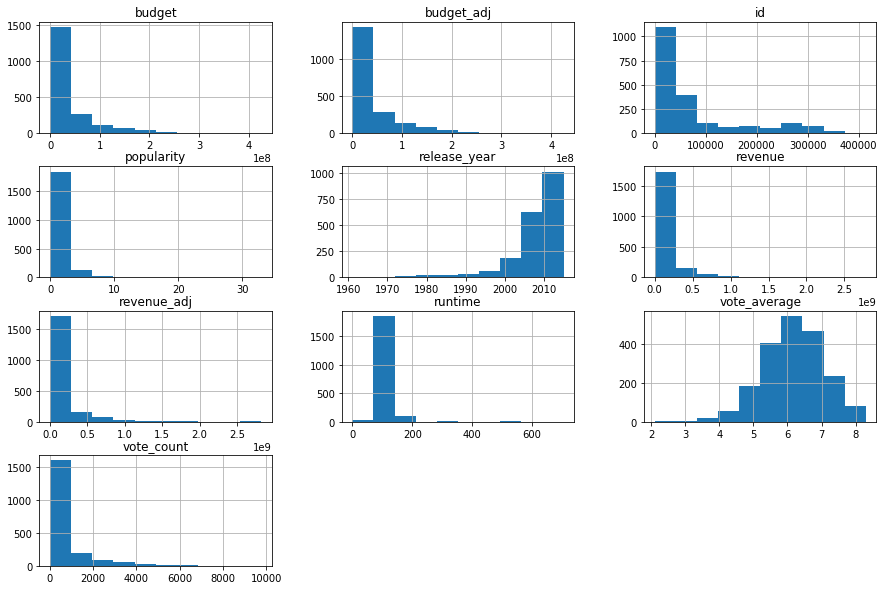

In [22]:
df.hist(figsize=(15,10));


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 10819
Data columns (total 21 columns):
id                      1992 non-null int64
imdb_id                 1992 non-null object
popularity              1992 non-null float64
budget                  1992 non-null int64
revenue                 1992 non-null int64
original_title          1992 non-null object
cast                    1992 non-null object
homepage                1992 non-null object
director                1992 non-null object
tagline                 1992 non-null object
keywords                1992 non-null object
overview                1992 non-null object
runtime                 1992 non-null int64
genres                  1992 non-null object
production_companies    1992 non-null object
release_date            1992 non-null object
vote_count              1992 non-null int64
vote_average            1992 non-null float64
release_year            1992 non-null int64
budget_adj              1992 non-null flo

In [24]:
df.describe()

id   popularity        budget       revenue      runtime  \
count    1992.000000  1992.000000  1.992000e+03  1.992000e+03  1992.000000   
mean    71652.152108     1.316763  3.454924e+07  1.152153e+08   106.040161   
std     92355.883915     1.873563  5.061878e+07  2.202887e+08    29.234592   
min        11.000000     0.000620  0.000000e+00  0.000000e+00     0.000000   
25%      9699.000000     0.384079  0.000000e+00  0.000000e+00    92.000000   
50%     35112.500000     0.774223  1.500000e+07  2.578782e+07   102.000000   
75%     83573.000000     1.538639  4.800000e+07  1.278787e+08   116.000000   
max    414419.000000    32.985763  4.250000e+08  2.781506e+09   705.000000   

        vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  1992.000000   1992.000000   1992.000000  1.992000e+03  1.992000e+03  
mean    643.616968      6.178614   2007.796687  3.627376e+07  1.302391e+08  
std    1092.355998      0.881955      7.549224  5.129783e+07  2.564338e+08  
min      10.000000      2.100000   1961.000000  0.000000e+00  0.000000e+00  
25%      51.000000      5.600000   2006.000000  0.000000e+00  0.000000e+00  
50%     210.000000      6.200000   2010.000000  1.524601e+07  2.806370e+07  
75%     688.250000      6.800000   2012.000000  5.064450e+07  1.393645e+08  
max    9767.000000      8.300000   2015.000000  4.250000e+08  2.827124e+09

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now the data is cleaned, so lets make some exploration. Compute statistics and create visualizations 
### Research Question 1 (Which genres are most popular from year to year?)

we will work on the types of genres and get the popularity of each type so we can get the most popular 

In [25]:
genres = df['genres'].value_counts()
genres

Drama                                           127
Comedy                                          105
Drama|Romance                                    52
Documentary                                      51
Horror|Thriller                                  50
                                               ... 
Drama|Mystery|Crime                               1
Action|Comedy|Adventure                           1
Fantasy|Drama|Comedy|Science Fiction|Romance      1
Animation|Drama|Science Fiction|Thriller          1
Animation|Drama                                   1
Name: genres, Length: 682, dtype: int64

Text(0.5, 1.0, 'popularity of genres')

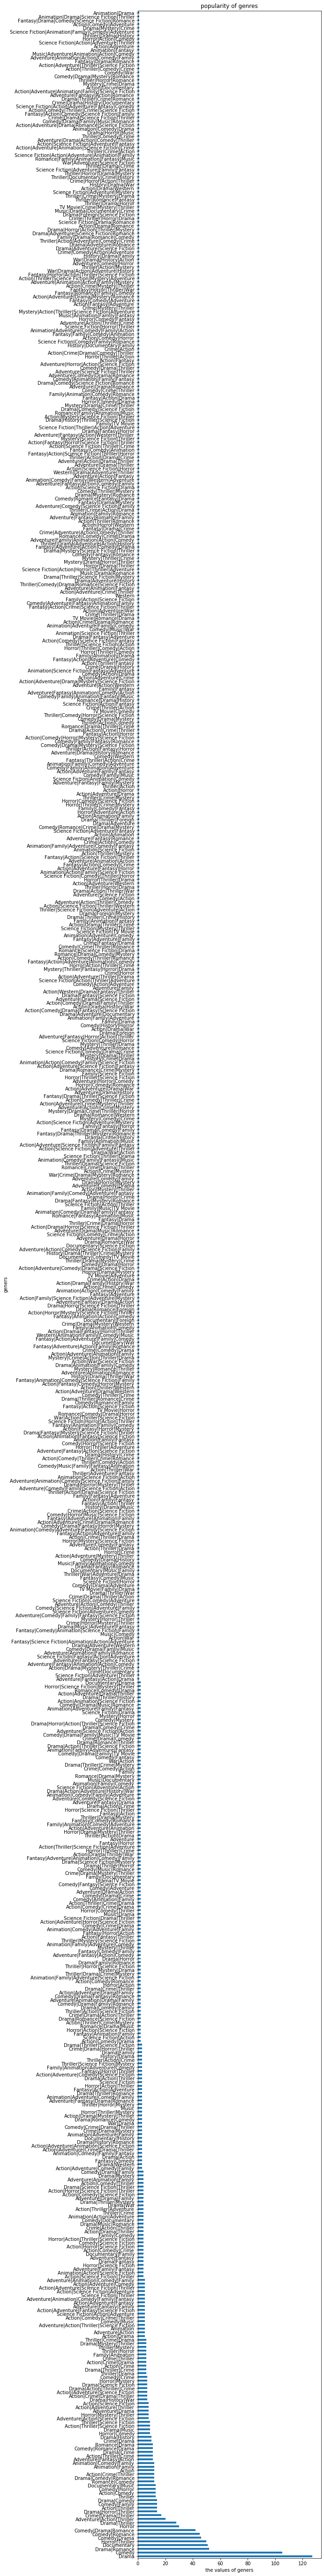

In [45]:
genres.plot(kind='barh',figsize=(7,100))
plt.ylabel('geners')
plt.xlabel('the values of geners')
plt.title('popularity of genres')

In [58]:
def separate_count(column):
    split_data = pd.Series(df[column].str.cat(sep = '|').split('|'))
    
    count_data = split_data.value_counts(ascending=False)
    return count_data

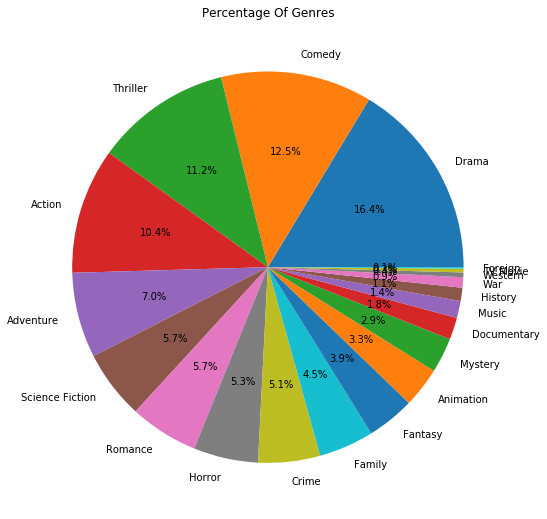

In [59]:
# Plot pie relationship between genre and number of movies
separate_count("genres").plot(kind="pie",figsize=(9,9),autopct="%1.1f%%")
# the title of the plot
plt.title('Percentage Of Genres')
plt.ylabel('');

<a id='conclusions'></a>
## Conclusions

> **Tip**:  Drama is the most popular

### Research Question 2  ( Which year has the highest release of movies?)

the highest release year is 2011

In [27]:
release = df['release_year'].value_counts()
release

2011    219
2010    206
2009    192
2015    165
2014    153
2012    145
2008    142
2007    135
2013    128
2006     92
2005     72
2004     48
2003     40
2002     31
1999     24
2000     20
2001     19
1996     15
1998     13
1997     11
1995     10
1993     10
1994      8
1987      8
1981      6
1990      6
1983      6
1979      5
1984      5
1989      5
1992      5
1985      4
1988      4
1978      4
1971      4
1982      3
1991      3
1977      3
1975      3
1973      2
1964      2
1974      2
1986      2
1976      2
1980      2
1972      1
1970      1
1969      1
1967      1
1965      1
1963      1
1962      1
1961      1
Name: release_year, dtype: int64

Text(0.5, 1.0, 'Number of movies in each year')

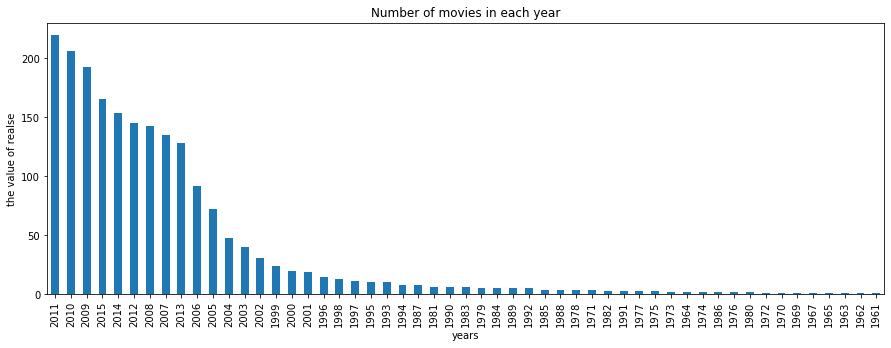

In [46]:
release.plot(kind='bar',figsize=(15,5))
plt.xlabel('years')
plt.ylabel('the value of realse')
plt.title('Number of movies in each year')


### Research Question 3 ( Which movies are the most popular of all time?)

I think the most popular movie that have the max popularity 

In [29]:
df['popularity'].max()

32.985763

In [30]:
df[df['popularity']==32.985763]

id    imdb_id  popularity     budget     revenue  original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810  Jurassic World   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   

                        homepage         director            tagline  ...  \
0  http://www.jurassicworld.com/  Colin Trevorrow  The park is open.  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   06/09/2015       5562   

   vote_average  release_year   budget_adj   revenue_adj  
0           6.5          2015  137999939.3  1.392446e+09  

[1 rows x 21 columns]

<a id='conclusions'></a>
## Conclusions

> **Tip**:  Jurassic World is the most popular movie

### Research Question 4 ( Which movie title had the highest budget??)

We will work on two variable ('budget') and ('original_title') , so we will get the max of budget

In [31]:
df[df['budget']==df['budget'].max()]

id    imdb_id  popularity     budget   revenue     original_title  \
2244  46528  tt1032751     0.25054  425000000  11087569  The Warrior's Way   

                                                   cast  \
2244  Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...   

                                    homepage    director  \
2244  http://www.iamrogue.com/thewarriorsway  Sngmoo Lee   

                      tagline  ...  \
2244  Assassin. Hero. Legend.  ...   

                                               overview runtime  \
2244  An Asian assassin (Dong-gun Jang) is forced to...     100   

                                         genres      production_companies  \
2244  Adventure|Fantasy|Action|Western|Thriller  Boram Entertainment Inc.   

     release_date vote_count  vote_average  release_year   budget_adj  \
2244   12/02/2010         74           6.4          2010  425000000.0   

      revenue_adj  
2244   11087569.0  

[1 rows x 21 columns]

In [32]:
df['budget'].describe()

count    1.992000e+03
mean     3.454924e+07
std      5.061878e+07
min      0.000000e+00
25%      0.000000e+00
50%      1.500000e+07
75%      4.800000e+07
max      4.250000e+08
Name: budget, dtype: float64

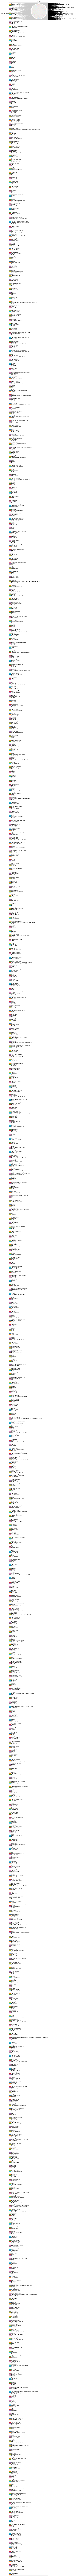

In [72]:
plt.pie(df['budget'],labels=df['original_title']);
plt.title('budget')
plt.legend(df['original_title'])
plt.show()

<a id='conclusions'></a>
## Conclusions

> **Tip**:  The Warrior's Way has the highest budget

### Research Question 5 (Does a bigger film production budget result in more popularity?)


we will see the effect of the variation of budget on  popularity .<br>
so we will work on popularity and budget 

Text(0.5, 1.0, 'relation between budget and popularity')

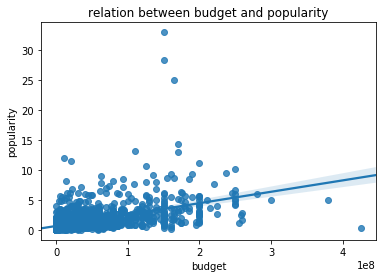

In [43]:
sns.regplot(x=df['budget'],y=df['popularity']).set_title('relation between budget and popularity')

<a id='conclusions'></a>
## Conclusions

> **Tip**:  there are a positive relation between budget and popularity with few exceptions

<a id='conclusions'></a>
##  limitations.

> **Tip**:  
1- there are many nan values in cast coulmn  <br>
2- there are many zerose in budget and revenues  <br>
3- there are many nan values in tageline <br>
4- duplicated rows <br>
5- incorrect data types




<a id='conclusions'></a>
## Conclusions

> **Tip**:  most popular from year to year is drama <br>
 the max number of movies was in  2011 <br>
 Jurassic World film has the highest popularity<br>
 The Warrior's Way film has the highest budget<br>
 there are a positive relation between budget and popularity with few exceptions<br>

